In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
from empiricaldist import Cdf

In [3]:
# Crear un Cdf vacio
d4 = Cdf()
d4

,probs


In [4]:
# Cdf que representa un dado de 6 lados
d4[1] = 1
d4[2] = 2
d4[3] = 3
d4[4] = 4
d4[5] = 5
d4[6] = 6 

d4

,probs
1,1
2,2
3,3
4,4
5,5
6,6


In [5]:
# Normalizando el Cdf
# de esta manera, la suma de las probabilidades es igual a 1
d4.normalize()

6

In [6]:
d4

,probs
1,0.166667
2,0.333333
3,0.500000
4,0.666667
5,0.833333
6,1.000000


### Propiedades

In [7]:
# un Cdf contiene en el indice las cantidades qs y en los valores las probabilidades ps
# Se devuelven como matriz
# indices
d4.qs

array([1, 2, 3, 4, 5, 6])

In [8]:
# probabilidades
d4.ps

array([0.16666667, 0.33333333, 0.5       , 0.66666667, 0.83333333,
       1.        ])

### Intercambio

In [9]:
#Debido a que Cdf es una Serie, puede ser inicializada con cualquier tipo de Series
# con dictionary
d = dict(a=1, b=2, c=3)
cdf = Cdf(d)
cdf.normalize()
cdf

,probs
a,0.333333
b,0.666667
c,1.000000


In [10]:
# con listas
qs = [1,2,3,4]
ps = [0.25, 0.50,0.75,1.0]
d4 = Cdf(ps, index=qs)
d4

,probs
1,0.25
2,0.50
3,0.75
4,1.00


In [11]:
# Copiar un Cdf
d4_copy = Cdf(d4)
d4_copy

,probs
1,0.25
2,0.50
3,0.75
4,1.00


In [12]:
# se debe tener cuidado a la hora de copiar ya que las copias comparten el mismo array
d4.index is d4_copy.index

True

In [13]:
d4.ps is d4_copy.ps

True

In [14]:
#Evita compartir el array con el parametro copy=True
d4_copy = Cdf(d4, copy=True)
d4_copy

,probs
1,0.25
2,0.50
3,0.75
4,1.00


In [15]:
d4.index is d4_copy.index

False

In [16]:
# utiliza la funcion copy de manera explicita para copiar un Cdf sin compartir el array
d4_copy = d4.copy()
d4_copy

,probs
1,0.25
2,0.50
3,0.75
4,1.00


In [17]:
d4.index is d4_copy.index

False

### Visualizacion de Cdf

In [18]:
# configuracion de graficos
def decorate_dice(title):
    plt.xlabel('Outcome')
    plt.ylabel('CDF')
    plt.title(title)

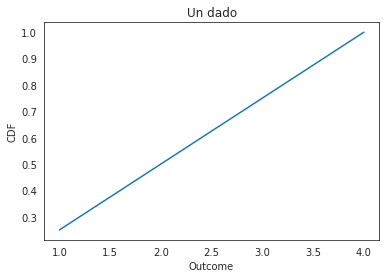

In [19]:
# grafico de la Cdf d4
d4.plot()
decorate_dice('Un dado')

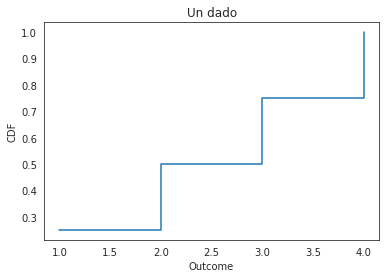

In [20]:
#Cdf poseen una funcion step la cual grafica la Cdf como una funcion de paso
d4.step()
decorate_dice('Un dado')

### Hacer Cdf from sequence

In [21]:
# la funcion from_sequence crea un objeto Cdf a partir de una secuencia de valores
cdf = Cdf.from_seq(list('jeinfferson'))
cdf

,probs
e,0.181818
f,0.363636
i,0.454545
j,0.545455
n,0.727273
o,0.818182
r,0.909091
s,1.000000


In [22]:
cdf = Cdf.from_seq(np.array([1,2,3,4,5]))
cdf

,probs
1,0.2
2,0.4
3,0.6
4,0.8
5,1.0


### Seleccion

In [23]:
# Cdf hereda [] de series, por lo que puede buscar un cuantil y obtener su probabilidad acumulada
#Probabilidad acumulada de la cara 3 de d4
d4[3]

0.75

In [24]:
#Probabilidad acumulada de la cada 2 de d4
d4[2]

0.5

In [25]:
#Los objetos Cdf son mutables, pero en general el resultado no es un Cdf valido
d4[5] = 1.25
d4

,probs
1,0.25
2,0.50
3,0.75
4,1.00
5,1.25


In [26]:
# al agregar una nueva cara y su correspondiente probabilidad rompemos la normalizacion
# La manera de arreglarlo es volver a normalizar el objeto Cdf
d4.normalize()
d4

,probs
1,0.2
2,0.4
3,0.6
4,0.8
5,1.0


### Evaluando CDFs

In [27]:
#Evalua la probabilidad acumulada en una distribucion CDFs de una cantidad especifica

#dado de 6 caras
d6 = Cdf.from_seq([1,2,3,4,5,6])

d6.forward(4)

array(0.66666667)

In [28]:
# Con el metodo forward podemos interpolar el valor de probabilidad acumulada para valores
# que no estan en la distribucion
d6.forward(3.5)

array(0.5)

In [29]:
d6.forward(8)

array(1.)

In [30]:
# __call__ es un sinonimo de forward, por lo que podemos llamar a Cdf como una funcion
d6(1)

array(0.16666667)

In [31]:
# forward tambien puede tomar un array de valores
d6.forward([1,3,5])

array([0.16666667, 0.5       , 0.83333333])

In [32]:
# Estilo de Grafica para Cdf
def decorate_cdf(title):
    plt.xlabel('Quantity')
    plt.ylabel('CDF')
    plt.title(title)

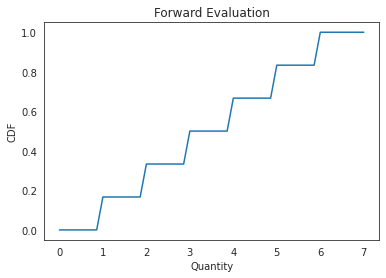

In [33]:
# Grafica de probabilidad para cada valor de una lista

qs = np.linspace(0,7)
ps = d6(qs)

plt.plot(qs, ps)
decorate_cdf('Forward Evaluation')

In [34]:
# Cdf tambien provee de la inversa, la cual calcula la inversa de Cdf
# Calcula el valor que corresponde a una probabilidad acumulada especifica de una Distribucion Cdf
d6.inverse(0.5)

array(3.)

In [35]:
# Utiliza el metodo quantile tambien para obtener el valor asociado a una probabilidad acumulada especifica
d6.quantile(0.16)

array(1.)

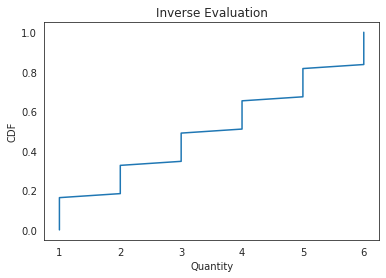

In [36]:
# Grafica del Valor para cada probabilidad acumulada
ps = np.linspace(0,1)
qs = d6.quantile(ps)
plt.plot(qs, ps)
decorate_cdf('Inverse Evaluation')

Estas funciones proporcionan una forma sencilla de hacer graficos Q-Q. Los Graficos Q-Q permiten realizar diagnosticos de diferencias entre la distribucion de probabilidad de una poblacion de la que se ha extraido una muestra aleatoria  y una distribucion usada para la comparacion

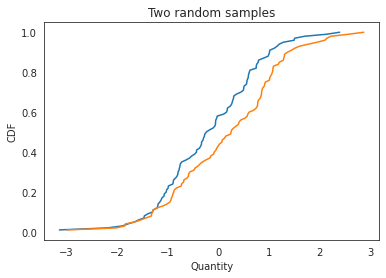

In [37]:
# dos muestras de la misma distribucion
cdf1 = Cdf.from_seq(np.random.normal(size=100))
cdf2 = Cdf.from_seq(np.random.normal(size=100))

cdf1.plot()
cdf2.plot()
decorate_cdf('Two random samples')


In [38]:
# Funcion para crear Graficos Q-Q
def qq_plot(cdf1, cdf2):
    """Evalua el Cdf inverso para una
        gama de probabilidades acumulativas
    """
    ps = np.linspace(0,1)
    q1 = cdf1.quantile(ps)
    q2 = cdf2.quantile(ps)
    return q1, q2

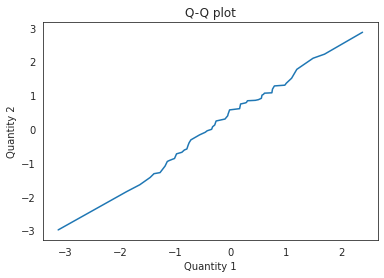

In [39]:
# utilizamos el grafico Q-Q para las dos muestras de la misma distribucion
q1, q2 = qq_plot(cdf1, cdf2)
plt.plot(q1, q2)
plt.xlabel('Quantity 1')
plt.ylabel('Quantity 2')
plt.title('Q-Q plot');

El resultado esta cerca de la linea identidad lo que sugiere que las muestras son de la misma distribucion

El grafico P-P compara las probabilidades entre una distribucion de probabilidad de una poblacion que se le ha extraido una muestra aleatoria y otra distribucion usada para la comparacion

In [40]:
# funcion para crear graficos P-P
def pp_plot(cdf1, cdf2):
    # evalua los Cdf para todas las cantidades en cualquiera de los dos Cdfs
    qs = cdf1.index.union(cdf2)
    p1 = cdf1(qs)
    p2 = cdf2(qs)
    return p1, p2

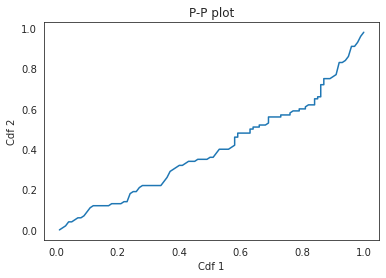

In [41]:
# utilizamos el grafico P-P para las dos muestras de la misma distribucion
p1, p2 = pp_plot(cdf1, cdf2)
plt.plot(p1, p2)
plt.xlabel('Cdf 1')
plt.ylabel('Cdf 2')
plt.title('P-P plot');

### Statistics

In [42]:
#Promedio
d6.mean()

3.5

In [43]:
# Varianza
d6.var()

2.916666666666667

In [44]:
# Desviacion estandar
d6.std()

1.7078251276599332

### Muestras

In [45]:
# choice elige valores aleatorios del Cdf, siguiendo la API de np.random.choice
d6.choice(size=10)

array([6, 5, 2, 3, 3, 2, 4, 6, 1, 2])

In [49]:
# sample elige valores aleatorios del Cdf, siguiendo la API de pd.Series.sample
d6.sample(n=10)

array([6., 5., 6., 5., 1., 6., 4., 5., 5., 5.])

### Aritmetica

In [50]:
# add_dist calcula la probabilidad de la suma de distribuciones
# la implementacion utiliza  productos externos para calcular la convolucion de las
# dos distribuciones

#distribucion de la suma de dos dados
d6 =Cdf.from_seq([1,2,3,4,5,6])
twice = d6.add_dist(d6)
twice


,probs
2,0.027778
3,0.083333
4,0.166667
5,0.277778
6,0.416667
7,0.583333
8,0.722222
9,0.833333
10,0.916667
11,0.972222


7.000000000000002

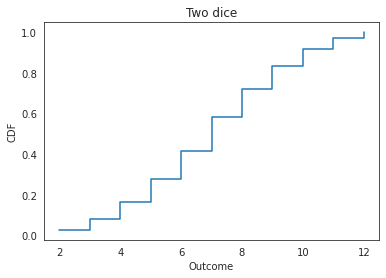

In [51]:
twice.step()
decorate_dice('Two dice')
twice.mean()

In [59]:
# Agregar una constante a una distribucion
# de esta manera puede construir un Pmf determinista

const = Cdf.from_seq([3]) # mueve las probabilidades. Probabilidad = 0 esta ahora en 3 
d6.add_dist(const)

,probs
4,0.166667
5,0.333333
6,0.500000
7,0.666667
8,0.833333
9,1.000000


In [60]:
# add_dist tambien maneja constantes como un caso especial
d6.add_dist(3)

,probs
4,0.166667
5,0.333333
6,0.500000
7,0.666667
8,0.833333
9,1.000000


In [61]:
# sub_dist mueve las probabilidades por debajo de los valores originales
d4 = Cdf.from_seq([1,2,3,4])
d6.sub_dist(d4)

,probs
-3,0.041667
-2,0.125000
-1,0.250000
0,0.416667
1,0.583333
2,0.750000
3,0.875000
4,0.958333
5,1.000000


In [62]:
# mul_dist recibe una lista como parametro y multiplica cada valor con los valores de la distribucion
# a su vez que recalcula la probabilidad acumulada para la nueva lista de valores
d4.mul_dist(d4)

,probs
1,0.0625
2,0.1875
3,0.3125
4,0.5000
6,0.6250
8,0.7500
9,0.8125
12,0.9375
16,1.0000


In [63]:
# div_dist() recibe como parametro una lista de valores y divide cada valor de la distribucion con 
#los valores de la lista y recalcula las probabilidades acumuladas para la nueva lista
d4.div_dist(d4)

,probs
0.250000,0.0625
0.333333,0.1250
0.500000,0.2500
0.666667,0.3125
0.750000,0.3750
1.000000,0.6250
1.333333,0.6875
1.500000,0.7500
2.000000,0.8750
3.000000,0.9375
